# Project Title: Building a Convolutional Neural Nets (CNN) to Classify Images in the CIFAR-100 Dataset

## Section 1: Objective of the Project
The objectives of the project are two-fold: 
* apply convolutional neural network (CNN) to classify a specific set of images 
* compare the performance of different CNN architectures.   

To achieve these objectives, we apply two CNN models one of which is the LeNet-5. The other model is similar to LeNet but it has different parameters (e.g. number of filters) with a dropout feature. 
Due to limited computational power of my machine, I will run these models with a small epoch size to test determine the performance and the run times. In case the performance is poor, additional parameter settings
will be explored to determine if the models can be further enhanced (e.g. increase the number of epochs).


## Section 2: Description of Dataset
This project uses the CIFAR-100 dataset. This dataset consists of 32x32 color images divided into 100 classes. Since each class has 600 images, it has 60000 images (600x100) in total. 
The 100 classes are:


| Superclass | Class |
|------|------|
| aquatic mammals | beaver, dolphin, otter, seal, whale |
| fish | aquarium fish, flatfish, ray, shark, trout |
| flowers | orchids, poppies, roses, sunflowers, tulips |
| food containers | bottles, bowls, cans, cups, plates |
| fruit and vegetables | apples, mushrooms, oranges, pears, sweet peppers |
| household electrical devices | clock, computer keyboard, lamp, telephone, television |
| household furniture | bed, chair, couch, table, wardrobe |
| insects | bee, beetle, butterfly, caterpillar, cockroach |
| large carnivores | bear, leopard, lion, tiger, wolf |
| large man-made outdoor things | bridge, castle, house, road, skyscraper |
| large natural outdoor scenes | cloud, forest, mountain, plain, sea |
| large omnivores and herbivores | camel, cattle, chimpanzee, elephant, kangaroo |
| medium-sized mammals | fox, porcupine, possum, raccoon, skunk |
| non-insect invertebrates | crab, lobster, snail, spider, worm |
| people | baby, boy, girl, man, woman |
| reptiles | crocodile, dinosaur, lizard, snake, turtle |
| small mammals | hamster, mouse, rabbit, shrew, squirrel |
| trees | maple, oak, palm, pine, willow |
| vehicles 1 | bicycle, bus, motorcycle, pickup truck, train |
| vehicles 2 | lawn-mower, rocket, streetcar, tank, tractor |

Of the 60,000 images, 50000 of them are training images and while the remaining 10000 are test images. For more details about the data, please refer to https://www.cs.toronto.edu/~kriz/cifar.html.
Moreover, Section 4 also provides additional information about the data.


## Section 3: Python Packages

This project requires the following packages.

In [13]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

## Section 4: Data Loading and Preparation

### Data loading, shuffling and splitting between train and test sets

In [5]:

(x_train, y_train), (x_test, y_test) = cifar100.load_data()


169009152/169001437 [==============================] - 19s 0us/step


### Data size

In [4]:

print('Dimension of training data:', x_train.shape)
print('Number of train samples:', x_train.shape[0])
print('Number of test samples:', x_test.shape[0])


Dimension of training data: (50000, 32, 32, 3)
Number of train samples: 50000
Number of test samples: 10000


### Random sample images from test and train data

##### One can see below that the y-variable is numeric ranging from 0 to 99 representing the 100 data classes.

In [29]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

##### There are equal number of samples for each class in the training and test datasets (i.e. 500 and 100 respectively).

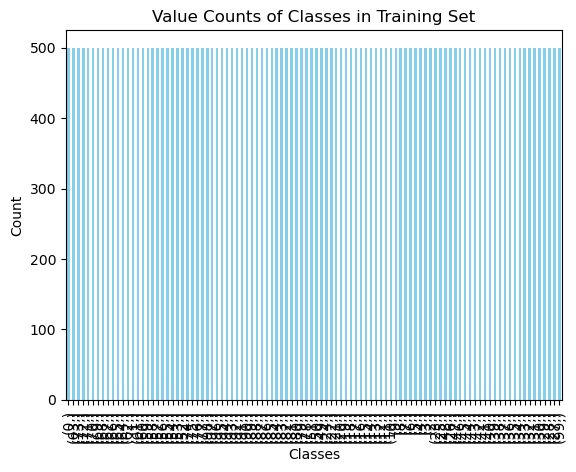

In [43]:
df = pd.DataFrame(y_train)
counts = df.value_counts()
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Value Counts of Classes in Training Set')
plt.show()

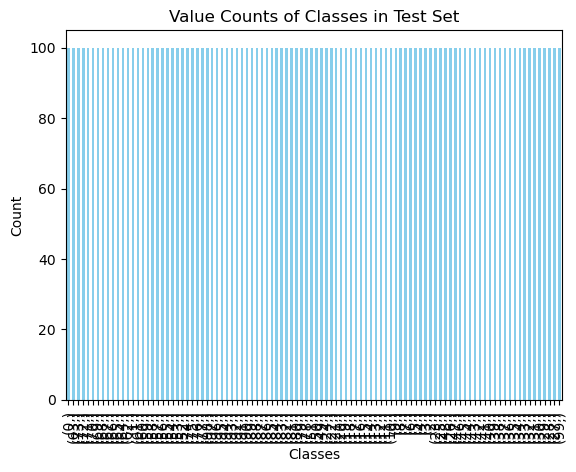

In [44]:
df = pd.DataFrame(y_test)
counts = df.value_counts()
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Value Counts of Classes in Test Set')
plt.show()

##### Below are two examples of the images from the training set.

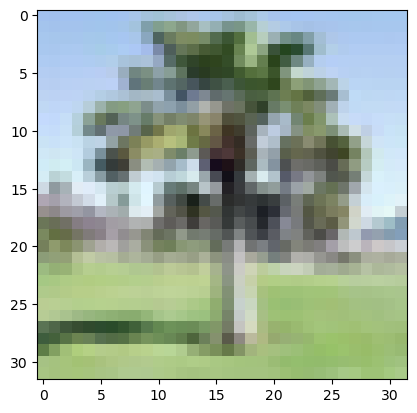

In [6]:

plt.imshow(x_train[1234]);


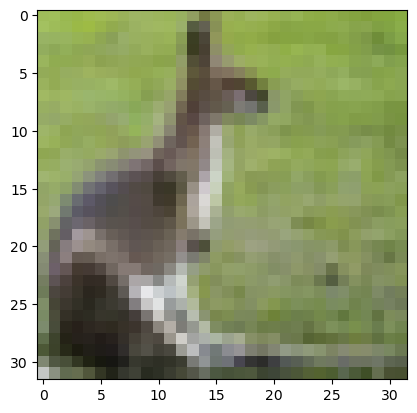

In [46]:

plt.imshow(x_test[1234]);


In [45]:
y_test[1234]

array([38])

### Data cleaning and exploration

##### Since CIFAR-100 dataset is a well-known and widely used data to studying machine learning, there is no need to clean and further explore the data. However, one must prepare (e.g. normalize) the data before they can be used in modeling using machine learning. The data preparation is presented below. 

### Data normalization

In [4]:
num_classes = 100

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

##### Now, instead of classes described by an integer between 0-99 we have a vector with a 1 in the (Pythonic) ith position (see array example below).


In [10]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

##### Next, the data are converted to float and are scaled to stabilize the optimization process and to prevent biases toward larger values. 

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Section 5: Build CNN Models



### Basic parameters

In [6]:
# number of epochs
epoch = 5
# learning rate
epsilon = 0.0005
# batch size
batch_size = 128


##### We set the size of the epoch to a small number in order to generate the results quickly. Later, we will test whether increasing the epochs and batch size will improve the results. 

### Section 5.1:  Model 1  
##### Let us build a simple CNN model with 2 convolution layers with 32 filters and 2 dense layers with dropout functionality. Its structure is summarized as follows:

##### Convolution -> Convolution -> Max Pooling -> Dropout -> Flatten -> Dense -> Dropout -> Dense -> "Softmax"

In [8]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(filters = 32,  kernel_size = (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
____

##### This model has 227K+ parameters. Next, we compile and run the model.


In [9]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=epsilon)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples


2025-02-19 15:00:17.407973: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2025-02-19 15:00:17.413304: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394300000 Hz
2025-02-19 15:00:17.413824: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5599d5adefc0 executing computations on platform Host. Devices:
2025-02-19 15:00:17.413866: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2025-02-19 15:00:17.453271: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

Epoch 1/5
50000/50000 [==============================] - 51s 1ms/sample - loss: 4.2821 - acc: 0.0508 - val_loss: 3.8790 - val_acc: 0.1229
Epoch 2/5
50000/50000 [==============================] - 50s 990us/sample - loss: 3.8273 - acc: 0.1162 - val_loss: 3.6955 - val_acc: 0.1537
Epoch 3/5
50000/50000 [==============================] - 48s 958us/sample - loss: 3.5996 - acc: 0.1510 - val_loss: 3.3686 - val_acc: 0.2058
Epoch 4/5
50000/50000 [==============================] - 49s 986us/sample - loss: 3.4477 - acc: 0.1787 - val_loss: 3.2136 - val_acc: 0.2269
Epoch 5/5
50000/50000 [==============================] - 49s 986us/sample - loss: 3.3362 - acc: 0.1982 - val_loss: 3.1465 - val_acc: 0.2430


##### RESULTS
##### We can observe the following:
##### * The model is completed rather quickly. It takes around 53s to complete one epoch.
##### * Accuracies in both training and testing data are low but they are improving over time.  

##### We will later test whether increasing the number of epoch would further lead to better performance (see Section 5.3).

### Section 5.2: Model 2 (LeNet-5)

##### We apply the LeNet model which has 2 convolution layers and 3 dense layers. It is almost similar to Model 1 but it does not have any dropout features and has one more dense layer. Its structure is summarized as follows: 

##### Convolution -> Max Pooling -> Convolution -> Max Pooling -> Flatten -> Dense -> Dense -> Dense -> "Softmax"

In [10]:
model_2 = Sequential()

model_2.add(Conv2D(filters=24, kernel_size=(5, 5), activation='relu', input_shape=x_train.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(units=200, activation='relu'))
model_2.add(Dense(units=120, activation='relu'))
model_2.add(Dense(units=num_classes, activation = 'softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 24)        1824      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        19232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               160200    
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

##### This model has fewer parameters than the first model. 

In [11]:
# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 107s 2ms/sample - loss: 4.1346 - acc: 0.0759 - val_loss: 3.8660 - val_acc: 0.1061
Epoch 2/5
50000/50000 [==============================] - 104s 2ms/sample - loss: 3.6402 - acc: 0.1534 - val_loss: 3.4939 - val_acc: 0.1778
Epoch 3/5
50000/50000 [==============================] - 108s 2ms/sample - loss: 3.3940 - acc: 0.1938 - val_loss: 3.3224 - val_acc: 0.2110
Epoch 4/5
50000/50000 [==============================] - 107s 2ms/sample - loss: 3.2056 - acc: 0.2289 - val_loss: 3.2486 - val_acc: 0.2221
Epoch 5/5
50000/50000 [==============================] - 109s 2ms/sample - loss: 3.0573 - acc: 0.2574 - val_loss: 3.1543 - val_acc: 0.2465


##### RESULTS
##### We can observe the following: Although LeNet architecture has fewer parameters than the first model, it has similar performance in terms of accuracy but with longer runtime. 
##### We will later test whether increasing the number of epochs would further lead to better performance (see Section 5.3).

### Section 5:3: Enhance Model 1 and Model 2

##### In this section, we will determine if the performance of Model 1 and Model 2 can be enhanced by increasing the number of epochs to 15.

##### Model 1

In [12]:

epoch = 15
model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 49s 988us/sample - loss: 3.2469 - acc: 0.2161 - val_loss: 3.1201 - val_acc: 0.2555
Epoch 2/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 3.1711 - acc: 0.2295 - val_loss: 3.0305 - val_acc: 0.2644
Epoch 3/15
50000/50000 [==============================] - 50s 1ms/sample - loss: 3.1137 - acc: 0.2385 - val_loss: 2.9437 - val_acc: 0.2864
Epoch 4/15
50000/50000 [==============================] - 52s 1ms/sample - loss: 3.0689 - acc: 0.2475 - val_loss: 2.9036 - val_acc: 0.2936
Epoch 5/15
50000/50000 [==============================] - 52s 1ms/sample - loss: 3.0144 - acc: 0.2607 - val_loss: 2.8737 - val_acc: 0.2980
Epoch 6/15
50000/50000 [==============================] - 52s 1ms/sample - loss: 2.9727 - acc: 0.2679 - val_loss: 2.8471 - val_acc: 0.3028
Epoch 7/15
50000/50000 [==============================] - 49s 988us/sample - loss: 2.9409 - acc: 0.2738 - val_loss

##### Model 2

In [13]:

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 112s 2ms/sample - loss: 2.9355 - acc: 0.2784 - val_loss: 3.1750 - val_acc: 0.2341
Epoch 2/15
50000/50000 [==============================] - 108s 2ms/sample - loss: 2.8309 - acc: 0.2997 - val_loss: 2.9146 - val_acc: 0.2886
Epoch 3/15
50000/50000 [==============================] - 107s 2ms/sample - loss: 2.7303 - acc: 0.3188 - val_loss: 2.9516 - val_acc: 0.2837
Epoch 4/15
50000/50000 [==============================] - 111s 2ms/sample - loss: 2.6447 - acc: 0.3370 - val_loss: 2.8173 - val_acc: 0.3050
Epoch 5/15
50000/50000 [==============================] - 110s 2ms/sample - loss: 2.5682 - acc: 0.3538 - val_loss: 2.7651 - val_acc: 0.3138
Epoch 6/15
50000/50000 [==============================] - 112s 2ms/sample - loss: 2.4981 - acc: 0.3684 - val_loss: 2.7689 - val_acc: 0.3196
Epoch 7/15
50000/50000 [==============================] - 110s 2ms/sample - loss: 2.4288 - acc: 0.3833 - val_l

#### RESULTS

##### Increasing the number of epochs improved the performance of both models. For example, Model 1's accuracy improved from around 24% to 35% as epochs increased from 5 to 15. 

# Section 6: Conclusion and Recommendation

##### Summary
In this project, we explored several CNN models to solve a classification problem using CIFAR-100 dataset. In particular, we started with a CNN model having many parameters (at least 200K) and followed this with LeNet-5 architecture which has slightly fewer parameters. Both models were initially run using 5 epochs in order to generate the results quickly. Next, we increased the epoch size of both models to 15 since the initial runs were completed very quickly and the performances were still improving. 

##### Winning model  

Based on the different models that I tested, I prefer to use the first model since it has similar performance as LeNet but with faster runtime. This may be due to the presence of dropout layer which speeds up the calculation processes. 

##### Further work

For both models, one can further explore the better values for its other parameters such as batch size, strides, and kernel size, or add new features such as additional nodes (for the first model) and dropout layer (for LeNet). Another potential future work is to study the performance of other known CNN architectures such as AlexNet and ResNet. Finally, study shows more elaborate and complex CNN architectures are necessary for CIFAR-100 dataset (see for example the comparison of the performances of different CNN models in https://paperswithcode.com/sota/image-classification-on-cifar-100). Therefore, one can study the different models and apply the important features to either Model 1 or Model 2.